# Japan Life Expectancy

In [1]:
import pandas as pd

In [2]:
# path to the .csv file 
data = "Japan_life_expectancy.csv"

# read the .csv file and create a dataframe
df = pd.read_csv(data)

In [3]:
for column in df.columns:
    print(column)

Prefecture
Life_expectancy
Physician
Junior_col
University
Public_Hosp
Pshic_hosp
Beds_psic
Nurses
Avg_hours
Salary
Elementary_school
Sport_fac
Park
Forest
Income_per capita
Density_pop
Hospitals
Beds
Ambulances
Health_exp
Educ_exp
Welfare_exp


## Life expectancy across the prefectures

#### Shiga prefecture had the highest life expectancy in Japan in 2020, with an average of 85.50 years. While the lowest average, 82.80, is found in Aomori, in the far north of the country’s main island, Honshu.

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Ordering the dataframe based on life expectancy
df_sorted = df.sort_values(by='Life_expectancy', ignore_index=True)

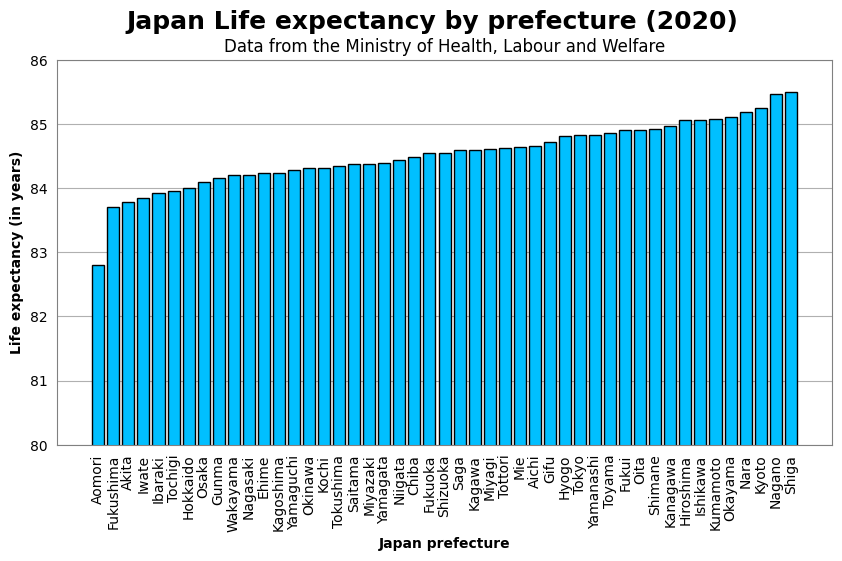

In [6]:
plt.figure(figsize=(10,5))
plt.bar(df_sorted['Prefecture'], df_sorted['Life_expectancy'], color='deepskyblue', edgecolor='black', zorder=2)

# Axis object
ax = plt.gca()

# Change the colors of the axis
ax.spines['top'].set_color('gray')       
ax.spines['bottom'].set_color('gray')  
ax.spines['left'].set_color('gray')     
ax.spines['right'].set_color('gray') 

# Remove ticks from the axis
ax.tick_params(axis='x', which='both', bottom=False, top=False)  
ax.tick_params(axis='y', which='both', left=False, right=False)  

# Y axis interval
plt.ylim(80, 86)

# Add a grid
plt.grid(True, axis='y', zorder=0)

# Title of the graph
plt.suptitle('Japan Life expectancy by prefecture (2020)', fontsize=18, fontweight='bold')

# Subtitle of the graph
plt.title('Data from the Ministry of Health, Labour and Welfare', fontsize=12)

plt.xlabel('Japan prefecture', fontweight='bold')
plt.ylabel('Life expectancy (in years)', fontweight='bold')

# Rotate the x labels
plt.xticks(rotation=90)

plt.show()

#### Curiously, the northern regions of Japan seem to have a shorter lifespan when compared to the rest of the country. This includes Japan’s northernmost region, Hokkaido, and Tohoku, where Aomori is situated.

In [7]:
# Create a dictionary to store the regions of Japan. Keys: regions; Values: prefectures.
regions = {
    "Hokkaido": ['Hokkaido'],
    "Tohoku": ['Akita', 'Aomori', 'Fukushima', 'Iwate', 'Miyagi', 'Yamagata'],
    "Kanto": ['Chiba', 'Gunma', 'Ibaraki', 'Kanagawa', 'Saitama', 'Tochigi', 'Tokyo'],
    "Chubu": ['Aichi', 'Fukui', 'Gifu', 'Ishikawa', 'Nagano', 'Niigata', 'Shizuoka', 'Toyama', 'Yamanashi'],
    "Kansai": ['Hyogo', 'Kyoto', 'Mie', 'Nara', 'Osaka', 'Shiga', 'Wakayama'],
    "Chugoku": ['Hiroshima', 'Okayama', 'Shimane', 'Tottori', 'Yamaguchi'],
    "Shikoku": ['Ehime', 'Kagawa', 'Kochi', 'Tokushima'],
    "Kyushu": ['Fukuoka', 'Kagoshima', 'Kumamoto', 'Miyazaki', 'Nagasaki', 'Oita', 'Okinawa', 'Saga']
}

In [8]:
# dictionary to store the average life expectancy of each region
regions_avg = {}

for region, prefectures in regions.items():
    sum = 0
    
    # sum the life expectancies of the prefectures of the current region
    for prefecture in prefectures:
        prefecture_life_expectancy = df_sorted.loc[df_sorted['Prefecture'] == prefecture, 'Life_expectancy'].values[0]
        sum += prefecture_life_expectancy

    # calculate the average of the region
    region_avg = sum / len(prefectures)

    # add the region_avg to the regions_avg dictionary
    regions_avg[region] = region_avg

In [9]:
regions_avg_sorted = dict(sorted(regions_avg.items(), key=lambda item: item[1]))

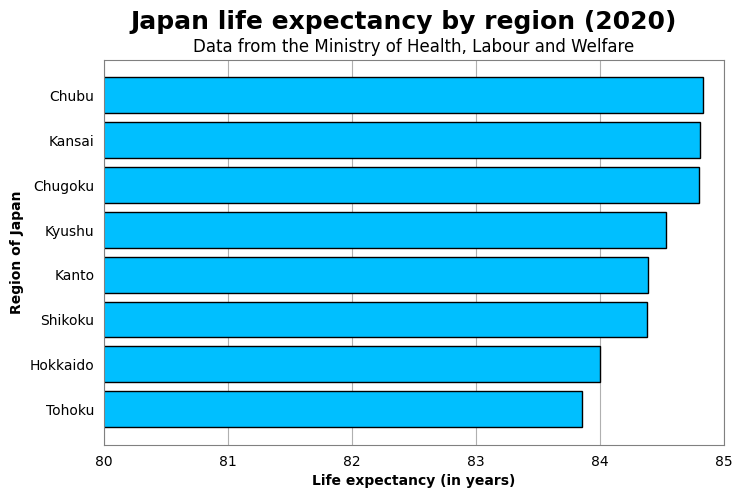

In [10]:
regions = list(regions_avg_sorted.keys())
regions_life_expectancy = list(regions_avg_sorted.values())

plt.figure(figsize=(8,5))

# bars of the bar chart
bars_regions = plt.barh(regions, regions_life_expectancy, edgecolor='black', color='deepskyblue', zorder=2)

# Axis object
ax = plt.gca()

# Change the colors of the axis
ax.spines['top'].set_color('gray')       
ax.spines['bottom'].set_color('gray')  
ax.spines['left'].set_color('gray')     
ax.spines['right'].set_color('gray')  

# Remove ticks from the axis
ax.tick_params(axis='x', which='both', bottom=False, top=False)  
ax.tick_params(axis='y', which='both', left=False, right=False)  

# X axis interval
plt.xlim(80, 85)

# Add a grid
plt.grid(True, axis='x', zorder=0)

# Title of the graph
plt.suptitle('Japan life expectancy by region (2020)', fontsize=18, fontweight='bold')

# Subtitle of the graph
plt.title('Data from the Ministry of Health, Labour and Welfare', fontsize=12)

# X and Y labels
plt.xlabel('Life expectancy (in years)', fontweight='bold')
plt.ylabel('Region of Japan', fontweight='bold')

plt.show()

#### Despite the national numbers, the northern areas still have high life expectancies worldwide. Aomori has the worst Japanese (and northern) average, but when analyzed on a global scale, this prefecture has one of the best numbers in the world. It would even enter the list of the 10 countries with the highest averages in 2020 as ninth place.

In [11]:
# Create a dataframe for the worldwide data
df_world = pd.read_csv('World_life_expectancy.csv')

# Remove the columns that won't be used
df_world = df_world.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', '2021', '2022', '2023', 'Unnamed: 68'])

# Remove the administrative regions, Hong Kong and Macao
administrative_regions = ['Hong Kong SAR, China', 'Macao SAR, China']
df_world = df_world[~df_world['Country Name'].isin(administrative_regions)]

# Columns of df_world that will be used 
country_2020 = ['Country Name', '2020']

# Create a dataframe with the name of the country and its life expectancy in 2020
df_world_2020 = df_world[country_2020]

In [12]:
# Order df_world_2020 based on life expectancy
df_world_2020_sorted = df_world_2020.sort_values(by='2020', ascending=False)

In [13]:
# Top 10 countries with the highest life expectancies in the world (not counting administrative regions Hong Kong and Macao)
top_10 = df_world_2020_sorted.iloc[0:10]

# Line with Aomori data to concat
new_line = pd.DataFrame({'Country Name': ['Aomori'], '2020': [82.80]})

# Top 10 countries + Aomori prefecture
top_10_with_aomori = pd.concat([top_10, new_line], ignore_index=True)

In [14]:
# Order top_10_with_aomori based on life expectancy
top_10_with_aomori_sorted = top_10_with_aomori.sort_values(by='2020', ignore_index=True)

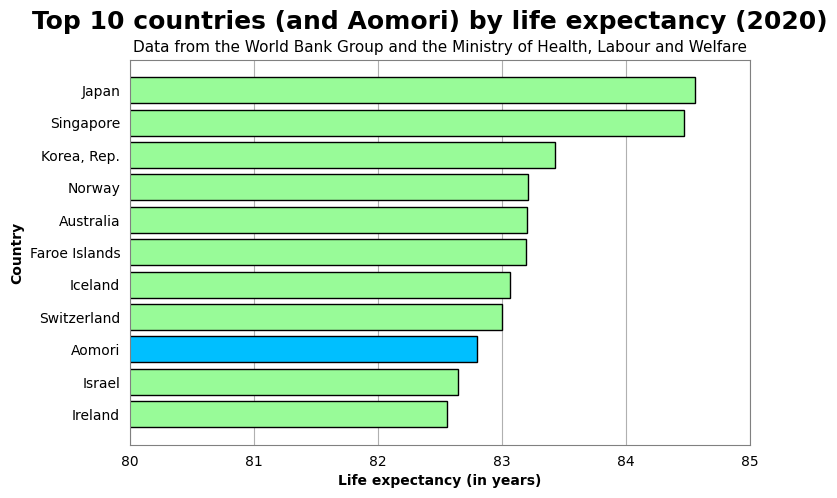

In [15]:
x_axis = top_10_with_aomori_sorted['2020']
y_axis = top_10_with_aomori_sorted['Country Name']

plt.figure(figsize=(8,5))

# Bars of the bar chart
bars = plt.barh(y_axis, x_axis, color='palegreen', edgecolor='black', zorder=2)

# Change the Aomori bar color to red
bars[2].set_color('deepskyblue')
bars[2].set_edgecolor('black')

# Axis object
ax = plt.gca()

# Change the colors of the axis
ax.spines['top'].set_color('gray')       
ax.spines['bottom'].set_color('gray')  
ax.spines['left'].set_color('gray')     
ax.spines['right'].set_color('gray')  

# Remove ticks from the axis
ax.tick_params(axis='x', which='both', bottom=False, top=False)  
ax.tick_params(axis='y', which='both', left=False, right=False)  

# X axis interval
plt.xlim(80, 85)

# Add a grid
plt.grid(True, axis='x', zorder=0)

# Title of the graph
plt.suptitle('Top 10 countries (and Aomori) by life expectancy (2020)', fontsize=18, fontweight='bold')

# Subtitle of the graph
plt.title('Data from the World Bank Group and the Ministry of Health, Labour and Welfare', fontsize=11)

plt.xlabel('Life expectancy (in years)', fontweight='bold')
plt.ylabel('Country', fontweight='bold')

plt.show()

#### In recent decades, Japan has seen its life expectancy increase by more than 15 years to reach the top of this list. In the early 1960s, the average Japanese person would live to be around 67 years old, and after six decades that number had risen to over 84 years.

In [16]:
japan_line = df_world[df_world['Country Name'] == 'Japan']

In [17]:
japan_numbers_1960_2020 = japan_line.drop(columns=['Country Name'])

In [18]:
years_1960_2020 = [column for column in japan_numbers_1960_2020.columns]
japan_life_expectancy_1960_2020 = japan_numbers_1960_2020.iloc[0].tolist()

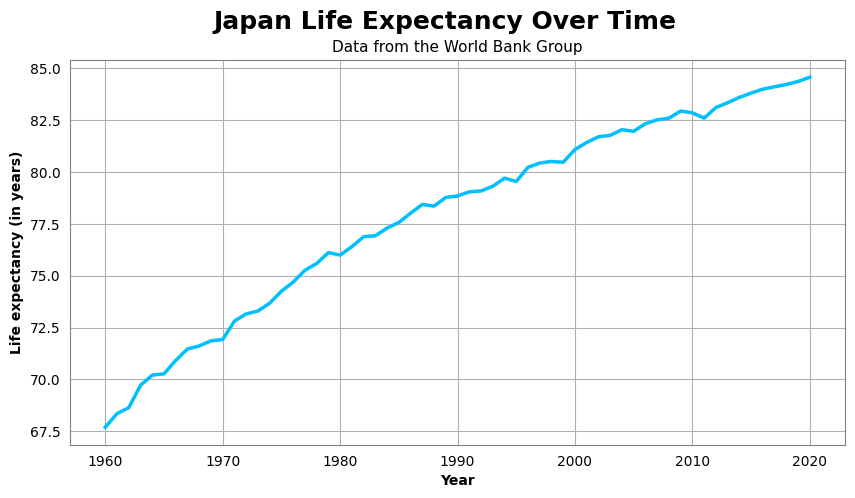

In [19]:
plt.figure(figsize=(10,5))

plt.plot(years_1960_2020, japan_life_expectancy_1960_2020, color='deepskyblue', linewidth=2.5, zorder=2)

# Axis object
ax = plt.gca()

# Change the colors of the axis
ax.spines['top'].set_color('gray')       
ax.spines['bottom'].set_color('gray')  
ax.spines['left'].set_color('gray')     
ax.spines['right'].set_color('gray')  

# Remove ticks from the axis
ax.tick_params(axis='x', which='both', bottom=False, top=False)  
ax.tick_params(axis='y', which='both', left=False, right=False)  

# Add a grid
plt.grid(True, axis='x', zorder=0)
plt.grid(True, axis='y', zorder=0)

# years to show on the x axis
years_to_show = ['1960', '1970', '1980', '1990', '2000', '2010', '2020',]
plt.xticks(years_to_show)

# Title of the graph
plt.suptitle('Japan Life Expectancy Over Time', fontsize=18, fontweight='bold')

# Subtitle of the graph
plt.title('Data from the World Bank Group', fontsize=11)

plt.ylabel('Life expectancy (in years)', fontweight='bold')
plt.xlabel('Year', fontweight='bold')

plt.show()

In [20]:
best_life_expectancy_year = {}

for year in df_world.select_dtypes(include='number').columns:
    best_life_expectancy_year[year] = df_world.loc[df_world[year].idxmax(), 'Country Name']

In [21]:
iceland_line = df_world[df_world['Country Name'] == 'Iceland']
sweden_line = df_world[df_world['Country Name'] == 'Sweden']

In [22]:
iceland_numbers_1960_2020 = iceland_line.drop(columns=['Country Name'])
sweden_numbers_1960_2020 = sweden_line.drop(columns=['Country Name'])

In [23]:
iceland_life_expectancy_1960_2020 = iceland_numbers_1960_2020.iloc[0].tolist()
sweden_life_expectancy_1960_2020 = sweden_numbers_1960_2020.iloc[0].tolist()

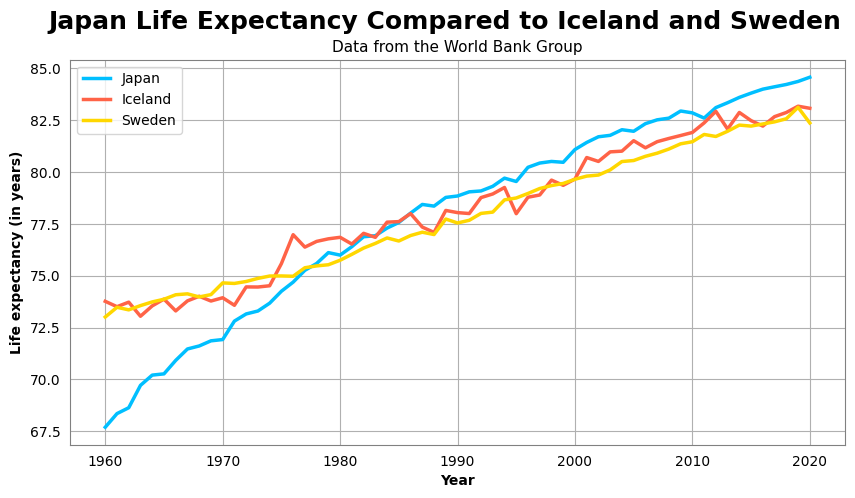

In [24]:
plt.figure(figsize=(10,5))

plt.plot(years_1960_2020, japan_life_expectancy_1960_2020, label='Japan', color='deepskyblue',linewidth=2.5, zorder=2)
plt.plot(years_1960_2020, iceland_life_expectancy_1960_2020, label='Iceland', color='tomato', linewidth=2.5, zorder=3)
plt.plot(years_1960_2020, sweden_life_expectancy_1960_2020, label='Sweden', color='gold', linewidth=2.5, zorder=4)

# Add a legend
plt.legend()

# Axis object
ax = plt.gca()

# Change the colors of the axis
ax.spines['top'].set_color('gray')       
ax.spines['bottom'].set_color('gray')  
ax.spines['left'].set_color('gray')     
ax.spines['right'].set_color('gray')  

# Remove ticks from the axis
ax.tick_params(axis='x', which='both', bottom=False, top=False)  
ax.tick_params(axis='y', which='both', left=False, right=False)  

# Add a grid
plt.grid(True, axis='x', zorder=0)
plt.grid(True, axis='y', zorder=0)

# years to show on the x axis
years_to_show = ['1960', '1970', '1980', '1990', '2000', '2010', '2020',]
plt.xticks(years_to_show)

# Title of the graph
plt.suptitle('Japan Life Expectancy Compared to Iceland and Sweden', fontsize=18, fontweight='bold')

# Subtitle of the graph
plt.title('Data from the World Bank Group', fontsize=11)

plt.ylabel('Life expectancy (in years)', fontweight='bold')
plt.xlabel('Year', fontweight='bold')

plt.show()